In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))


In [2]:


datacamp_news = pd.read_csv("../fake_news/data/data_camp_news_fake_or_real.csv")
del datacamp_news["Unnamed: 0"]
print (datacamp_news.shape)
datacamp_news.head()
datacamp_news = datacamp_news[datacamp_news.text != " "]


def clean_text(text_data):
    """clean text from punctuation"""
    #text_data = str(text_data).decode("utf-8")

    for punc in "@#^*():,'/.":
        text_data = text_data.replace(punc, "").replace("\n","")

    #text_data = text_data.encode('ascii',errors='ignore')
    return text_data

datacamp_news["original_text"] = datacamp_news.text
datacamp_news.text = datacamp_news.text + datacamp_news.title
datacamp_news.text = datacamp_news.text.apply(lambda val: clean_text(val))

(6335, 3)


In [3]:
# split data
from sklearn.cross_validation import train_test_split
X = datacamp_news[[i for i in datacamp_news if i != "label"]]
target = datacamp_news["label"]
X_train, X_test,y_train, y_test = train_test_split(X, target, test_size = .33)

/Users/Stav/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

no_features = 1000

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english', min_df=.01)
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train.text) 
# Transform the test set 
count_test = count_vectorizer.transform(X_test.text)


In [5]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(penalty = "l2")

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)


print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])
print (cr)


cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.909
             precision    recall  f1-score   support

       FAKE       0.90      0.92      0.91       997
       REAL       0.92      0.90      0.91      1082

avg / total       0.91      0.91      0.91      2079



0    1
0  914   83
1  106  976

In [6]:
feature_names = count_vectorizer.get_feature_names()
feature_imp = pd.DataFrame(clf.coef_[0],feature_names)
feature_imp.columns = ["coef"]

In [7]:
feature_imp

coef
10         -0.178576
100        -0.197237
1000       -0.294331
10000      -0.179607
100000     -0.019486
11          0.095233
12          0.100495
13          0.569371
14         -0.292189
15         -0.146539
150         0.127764
16         -0.234831
17         -0.137060
18         -0.189975
19         -0.074923
1960s       0.087538
1970s      -0.000905
1980       -0.052203
1980s      -0.003522
1988        0.062956
1990        0.000252
1990s       0.055688
1991       -0.082988
1992       -0.043023
1993        0.013836
1994       -0.025287
1995       -0.031663
1996       -0.061176
1997        0.038455
1998       -0.061900
...              ...
worth      -0.023051
worthy      0.094162
wouldn      0.109340
wouldnt     0.141344
wound       0.090105
wounded    -0.137845
write      -0.068907
writer     -0.015146
writers     0.068511
writes      0.213705
writing    -0.023460
written    -0.028334
wrong       0.163247
wrongdoing  0.003674
wrote      -0.125868
yeah       -0.211171
year        0.090119
years      -0.194474
yemen      -0.145681
yes         0.135369
yesterday  -0.288841
york        0.384655
young       0.100209
younger    -0.125847
youre       0.255315
youth      -0.279600
youtube    -0.393400
youve       0.010702
zero       -0.195606
zone        0.089503

[4799 rows x 1 columns]

In [8]:
feature_imp[feature_imp.coef > .5].sort_values(by = "coef",ascending = True)

coef
trust         0.500488
nomination    0.500998
european      0.503385
program       0.506232
nbc           0.512991
remains       0.518627
executives    0.523937
fox           0.525339
killing       0.532985
2013          0.536922
ohio          0.548487
looks         0.550451
labor         0.552463
campaign      0.562611
tuesday       0.569198
13            0.569371
2017          0.578875
convention    0.585780
watergate     0.589411
rush          0.589542
iowa          0.601373
islamic       0.601491
immigration   0.603337
positions     0.609443
cruz          0.612241
insist        0.614321
tech          0.634835
conservative  0.641177
dismantling   0.642168
thursday      0.644843
shooting      0.658591
center        0.663061
pushing       0.664212
verdict       0.674377
lead          0.678377
primary       0.680751
gop           0.692514
barack        0.717900
saturday      0.727125
thats         0.727750
marriage      0.731285
message       0.736164
friday        0.779551
reform        0.792041
consequences  0.796521
rules         0.797763
sweeping      0.805260
easier        0.863299
candidates    1.206008

In [9]:
feature_imp[feature_imp.coef < -.5].sort_values(by = "coef",ascending = False)

coef
refugee       -0.503692
healthcare    -0.504680
email         -0.513781
plant         -0.516224
image         -0.521118
watch         -0.522989
weight        -0.523001
demand        -0.525123
operation     -0.535110
corporate     -0.537590
video         -0.537730
videos        -0.542199
dark          -0.542261
approved      -0.574042
dr            -0.575342
single        -0.587257
sign          -0.598139
soon          -0.618928
russia        -0.631131
podesta       -0.640649
comments      -0.649473
oct           -0.658059
wikileaks     -0.736293
photo         -0.736516
establishment -0.755421
print         -0.776539
advertisement -0.794776
hillary       -0.808231
article       -0.808426
share         -0.825306
source        -0.849030
november      -0.884144
2016          -0.933367
28            -0.984715
october       -1.103968

In [10]:
from nltk.tokenize import sent_tokenize


datacamp_news.original_text = datacamp_news.original_text.apply(lambda val: sent_tokenize(val))

In [11]:
datacamp_news.original_text[150]

['Notable names include Ray Washburne (Commerce), a Dallas-based investor, is reported to be under consideration to lead the department.']

In [12]:
feature_imp.head()

coef
10     -0.178576
100    -0.197237
1000   -0.294331
10000  -0.179607
100000 -0.019486

In [13]:
feature_imp = feature_imp.reset_index()
feature_imp.columns = ["name","coef"]

In [13]:
feature_imp[feature_imp.name == "trump"].coef.values[0]

-0.05801384481705784

In [23]:
 # -*- coding: utf-8 -*- 
a =[['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.', 0], ['In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.', 0], ['The word \xe2\x80\x9cunprecedented\xe2\x80\x9d has been thrown around so often this election that it ought to be retired.', 0], ['But it\xe2\x80\x99s still unprecedented for the nominee of a major political party to go war with the FBI.', 0], ['But that\xe2\x80\x99s exactly what Hillary and her people have done.', 0], ['Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary\xe2\x80\x99s opponent in this election.', 0], ['The FBI is under attack by everyone from Obama to CNN.', 1], ['Hillary\xe2\x80\x99s people have circulated a letter attacking Comey.', 0], ['There are currently more media hit pieces lambasting him than targeting Trump.', 0], ['It wouldn\xe2\x80\x99t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.', 1], ['The FBI\xe2\x80\x99s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary.', 1], ['And the FBI\xe2\x80\x99s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton.', 0], ['The covert struggle between FBI agents and Obama\xe2\x80\x99s DOJ people has gone explosively public.', 0], ['The New York Times has compared Comey to J. Edgar Hoover.', 0], ['Its bizarre headline, \xe2\x80\x9cJames Comey Role Recalls Hoover\xe2\x80\x99s FBI, Fairly or Not\xe2\x80\x9d practically admits up front that it\xe2\x80\x99s spouting nonsense.', 0], ['The Boston Globe has published a column calling for Comey\xe2\x80\x99s resignation.', 1], ['Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women.', 1], ['James Carville appeared on MSNBC to remind everyone that he was still alive and insane.', 0], ['He accused Comey of coordinating with House Republicans and the KGB.', 0], ['And you thought the \xe2\x80\x9cvast right wing conspiracy\xe2\x80\x9d was a stretch.', 1], ['Countless media stories charge Comey with violating procedure.', 0], ['Do you know what\xe2\x80\x99s a procedural violation?', 0], ['Emailing classified information stored on your bathroom server.', 1], ['Senator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act.', 0], ['The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment.', 0], ['But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever.', 0], ['If James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it.', 1], ['Not too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement.', 1], ['If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation?', 1], ['Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weiner\xe2\x80\x99s computer?', 0], ['Either Comey is the most cunning FBI director that ever lived or he\xe2\x80\x99s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillary\xe2\x80\x99s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs.', 1], ['The only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency.', 1], ['Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating.', 0], ['And it\xe2\x80\x99s an interesting question.', 0], ['Hillary\xe2\x80\x99s old strategy was to lie and deny that the FBI even had a criminal investigation underway.', 0], ['Instead her associates insisted that it was a security review.', 0], ['The FBI corrected her and she shrugged it off.', 0], ['But the old breezy denial approach has given way to a savage assault on the FBI.', 1], ['Pretending that nothing was wrong was a bad strategy, but it was a better one that picking a fight with the FBI while lunatic Clinton associates try to claim that the FBI is really the KGB.', 0], ['There are two possible explanations.', 0], ['Hillary Clinton might be arrogant enough to lash out at the FBI now that she believes that victory is near.', 0], ['The same kind of hubris that led her to plan her victory fireworks display could lead her to declare a war on the FBI for irritating her during the final miles of her campaign.', 1], ['But the other explanation is that her people panicked.', 0], ['Going to war with the FBI is not the behavior of a smart and focused presidential campaign.', 1], ['It\xe2\x80\x99s an act of desperation.', 0], ['When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, that\xe2\x80\x99s not hubris, it\xe2\x80\x99s fear of what the FBI might be about to reveal about her.', 1], ['During the original FBI investigation, Hillary Clinton was confident that she could ride it out.', 0], ['And she had good reason for believing that.', 0], ['But that Hillary Clinton is gone.', 0], ['In her place is a paranoid wreck.', 0], ['Within a short space of time the \xe2\x80\x9cpositive\xe2\x80\x9d Clinton campaign promising to unite the country has been replaced by a desperate and flailing operation that has focused all its energy on fighting the FBI.', 1], ['There\xe2\x80\x99s only one reason for such bizarre behavior.', 0], ['The Clinton campaign has decided that an FBI investigation of the latest batch of emails poses a threat to its survival.', 1], ['And so it\xe2\x80\x99s gone all in on fighting the FBI.', 0], ['It\xe2\x80\x99s an unprecedented step born of fear.', 0], ['It\xe2\x80\x99s hard to know whether that fear is justified.', 1], ['But the existence of that fear already tells us a whole lot.', 1], ['Clinton loyalists rigged the old investigation.', 0], ['They knew the outcome ahead of time as well as they knew the debate questions.', 1], ['Now suddenly they are no longer in control.', 0], ['And they are afraid.', 0], ['You can smell the fear.', 0], ['The FBI has wiretaps from the investigation of the Clinton Foundation.', 0], ['It\xe2\x80\x99s finding new emails all the time.', 1], ['And Clintonworld panicked.', 0], ['The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire.', 0], ['All that\xe2\x80\x99s here is the appearance of impropriety without any of the substance.', 0], ['But this isn\xe2\x80\x99t how you react to smoke.', 0], ['It\xe2\x80\x99s how you respond to a fire.', 0], ['The misguided assault on the FBI tells us that Hillary Clinton and her allies are afraid of a revelation bigger than the fundamental illegality of her email setup.', 0], ['The email setup was a preemptive cover up.', 0], ['The Clinton campaign has panicked badly out of the belief, right or wrong, that whatever crime the illegal setup was meant to cover up is at risk of being exposed.', 1], ['The Clintons have weathered countless scandals over the years.', 1], ['Whatever they are protecting this time around is bigger than the usual corruption, bribery, sexual assaults and abuses of power that have followed them around throughout the years.', 1], ['This is bigger and more damaging than any of the allegations that have already come out.', 0], ['And they don\xe2\x80\x99t want FBI investigators anywhere near it.', 1], ['The campaign against Comey is pure intimidation.', 1], ['It\xe2\x80\x99s also a warning.', 0], ['Any senior FBI people who value their careers are being warned to stay away.', 1], ['The Democrats are closing ranks around their nominee against the FBI.', 0], ['It\xe2\x80\x99s an ugly and unprecedented scene.', 0], ['It may also be their last stand.', 0], ['Hillary Clinton has awkwardly wound her way through numerous scandals in just this election cycle.', 1], ['But she\xe2\x80\x99s never shown fear or desperation before.', 1], ['Now that has changed.', 0], ['Whatever she is afraid of, it lies buried in her emails with Huma Abedin.', 1], ['And it can bring her down like nothing else has.', 0]]

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-23-d10ac3f6daec>, line 12)

In [18]:
a 

NameError: name 'a' is not defined

In [14]:
def highlight_sentences(sentences):
    sentence_marks = []
    sentences = sent_tokenize(sentences)
    for sentence in sentences:
        sentence_mark = 0
        words = sentence.split(" ")
        for word in words:        
            try:
                grade = feature_imp[feature_imp.name == word].coef.values[0]
                #print (grade)
                if grade > .2:
                    sentence_mark = 1
                if  grade > .5:
                    sentence_mark = 2
                if  grade > .8:
                    sentence_mark = 3
                    break
                else:
                    continue
            except:
                continue
        sentence_marks.append(sentence_mark)

    return ([(sentence, mark) for sentence, mark in zip(sentences, sentence_marks)]), sum(sentence_marks)


    
highlight_sentences(a)     
#datacamp_news["marked_sentences"] = datacamp_news.original_text.apply(lambda val: highlight_sentences(val))
#datacamp_news['summed_marks'] = datacamp_news.marked_sentences.apply(lambda val: val[1])

NameError: name 'a' is not defined

In [140]:
highlight_sentences(a)

([('The second memo was written by Cody Shearer, a controversial political activist and former journalist who was close to the Clinton White House in the 1990s.',
   1),
  ('Advertisement\n\nUnlike Steele, Shearer does not have a background in espionage, and his memo was initially viewed with scepticism, not least because he had shared it with select media organisations before the election.',
   1),
  ('However, the Guardian has been told the FBI investigation is still assessing details in the “Shearer memo” and is pursuing intriguing leads.',
   1),
  ('One source with knowledge of the inquiry said the fact the FBI was still working on it suggested investigators had taken an aspect of it seriously.',
   2),
  ('It raises the possibility that parts of the Steele dossier, which has been derided by Trump’s supporters, may have been corroborated by Shearer’s research, or could still be.',
   0),
  ('The revelation comes at a moment when Donald Trump and some Republican lawmakers have been

In [18]:
sent_tokenize(a)

['The second memo was written by Cody Shearer, a controversial political activist and former journalist who was close to the Clinton White House in the 1990s.',
 'Advertisement\n\nUnlike Steele, Shearer does not have a background in espionage, and his memo was initially viewed with scepticism, not least because he had shared it with select media organisations before the election.',
 'However, the Guardian has been told the FBI investigation is still assessing details in the “Shearer memo” and is pursuing intriguing leads.',
 'One source with knowledge of the inquiry said the fact the FBI was still working on it suggested investigators had taken an aspect of it seriously.',
 'It raises the possibility that parts of the Steele dossier, which has been derided by Trump’s supporters, may have been corroborated by Shearer’s research, or could still be.',
 'The revelation comes at a moment when Donald Trump and some Republican lawmakers have been seeking to cast doubt on the credibility of th

In [16]:
datacamp_news = pd.read_csv("./summed_datacamp.csv")

In [111]:
datacamp_news.head().marked_sentences[0][0]""

[['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.',
  0],
 ['In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.',
  0],
 ['The word “unprecedented” has been thrown around so often this election that it ought to be retired.',
  0],
 ['But it’s still unprecedented for the nominee of a major political party to go war with the FBI.',
  0],
 ['But that’s exactly what Hillary and her people have done.', 0],
 ['Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election.',
  0],
 ['The FBI is under attack by everyone from Obama to CNN.', 1],
 ['Hillary’s people have circulated a letter attacking Comey.', 0],
 ['There are currently more media hit pieces lambasting him than targeting Trump.',
  0],
 ['It wouldn’t be too surprising if the Clintons or their allies were to start ru

In [17]:
 datacamp_news.summed_marks

0       31
1       11
2       13
3        5
4       10
5       46
6       14
7        3
8       52
9       20
10      15
11      10
12       4
13       2
14       1
15      87
16       2
17       7
18      30
19       8
20      17
21       2
22      17
23      41
24      16
25      38
26      12
27      10
28      23
29       9
        ..
6304    11
6305     6
6306     1
6307    11
6308     4
6309    98
6310    27
6311    29
6312    19
6313    20
6314     5
6315    44
6316    27
6317     1
6318     3
6319    11
6320    14
6321     2
6322     4
6323    33
6324     9
6325     8
6326    12
6327     9
6329    11
6330    24
6331    26
6332    39
6333    20
6334    32
Name: summed_marks, Length: 6299, dtype: int64

In [18]:
datacamp_news.to_csv("summed_datacamp.csv")

label
FAKE    AxesSubplot(0.125,0.125;0.775x0.755)
REAL    AxesSubplot(0.125,0.125;0.775x0.755)
Name: summed_marks, dtype: object

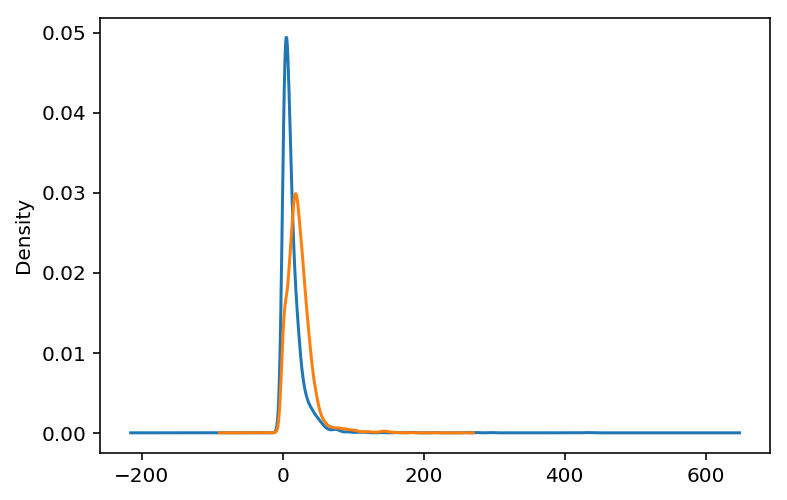

In [96]:
datacamp_news.groupby("label").summed_marks.plot(kind = "kde", label = "label")

In [47]:
summed_df = pd.DataFrame(datacamp_news.groupby(["label","summed_marks"]).count().title) #.plot(kind = "bar")#.plot(kind = "bar")

summed_df = summed_df.reset_index()

In [97]:
summed_df.head()

label  summed_marks  title
0  FAKE             0    163
1  FAKE             1    213
2  FAKE             2    186
3  FAKE             3    175
4  FAKE             4    217

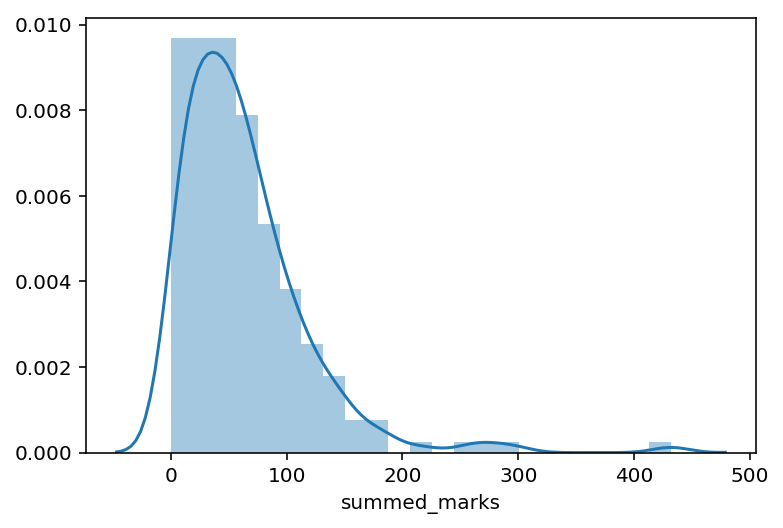

In [83]:
sns.distplot(summed_df.summed_marks)

In [81]:
summed_df.groupby("label").describe()

summed_marks                                                        \
             count       mean        std  min    25%   50%    75%    max   
label                                                                      
FAKE          95.0  63.231579  68.555996  0.0  23.50  47.0  73.50  432.0   
REAL         114.0  62.991228  42.666124  0.0  28.25  56.5  92.75  180.0   

       title                                                     
       count       mean        std  min  25%  50%    75%    max  
label                                                            
FAKE    95.0  32.926316  55.114049  1.0  1.0  7.0  38.00  217.0  
REAL   114.0  27.815789  37.986156  1.0  1.0  6.0  47.75  227.0

<Container object of 95 artists>

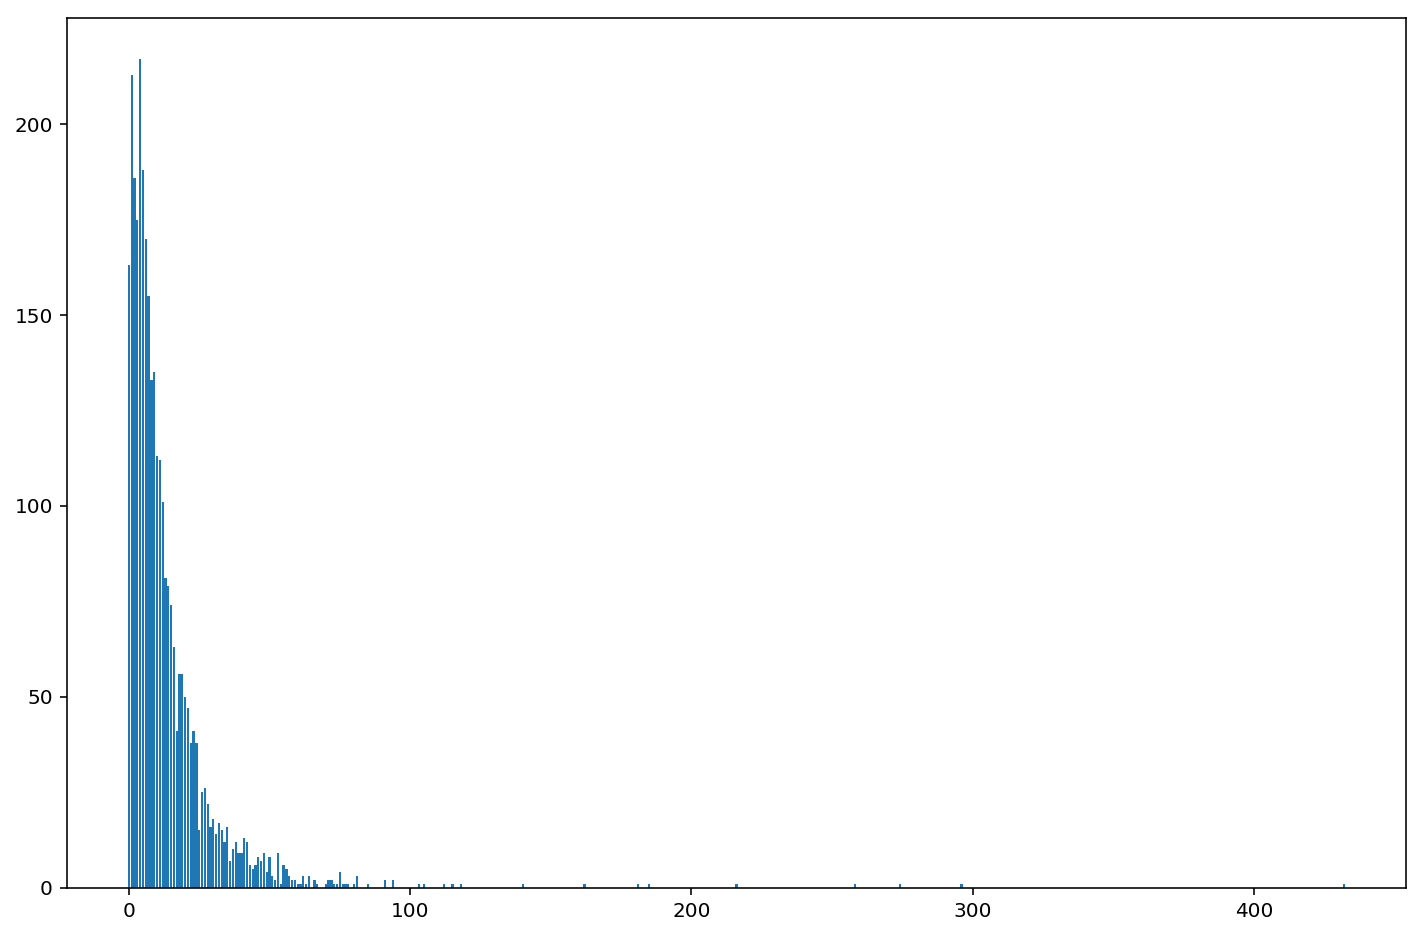

In [78]:
plt.figure(figsize = (12,8))
new_summed_df = summed_df[summed_df.label == "FAKE"]
del new_summed_df["label"]
#new_summed_df = new_summed_df.reset_
plt.bar(new_summed_df.summed_marks, new_summed_df.title)

In [103]:
import joblib
text_clf = joblib.load("./flask_code/text_clf.pkl")


ValueError: You may be trying to read with python 3 a joblib pickle generated with python 2. This feature is not supported by joblib.